# **Netflix Project**

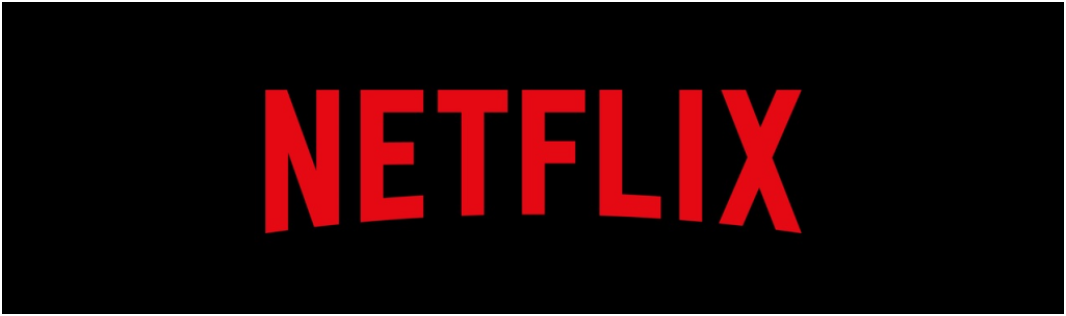

# **Business Problem**
 **Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries**
* Which genre is best
* Which actor with highest number of movies / TV Shows
* Director with highest number of movies / TV Shows
* Understanding what content is available in different countries
* Does Netflix has more focus on TV Shows than movies in recent years.

# **Data Exploration**


**1. Defining Problem Statement and Analysing basic metrics**

In [ ]:
from google.colab import files
upload = files.upload()

Saving netflix_titles.csv to netflix_titles (1).csv


**Import Libraries**

In [ ]:
import numpy as np , pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading The Dataset**

In [ ]:
df = pd.read_csv('netflix_titles.csv')

**Check the first 5 rows of the data.**

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## **2: Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection,statistical summary : -**

**shape of data**

In [ ]:
df.shape

(8807, 12)

**All attributes**

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**The dimension of data**

In [ ]:
df.ndim

2

**Data types of all the attributes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Statistical Summary Before Data Cleaning :-**

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.describe(include= object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [ ]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


* **Almost all the column have object as a datetype except release year**

*  **We have has 8807 rows, 12 columns.**
*  **We have missing values in director , cast , country , date_added , rating and duration column**




# **Data Cleaning**


#### **1. Handling null values**

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Conclusion :-**

* **There are a total of 4307 null values across the entire dataset with : -**
* **2634 missing points under-"director",**
* **825 under- "cast",**
* **831 under -"country",**
* **11 under - "date_added",**
* **4 under - "rating" and**
* **3 under “duration ”.**

*  **We will have to handle all null data points before we can dive into EDA and
modelling.**

In [ ]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

⏩ **We observe that 3 values of rating was not appropriate and by visualising it was found that 'rating' column contained values of 'duration' in those rows.**

In [ ]:
df[df['rating'].isin(['74 min', '84 min', '66 min'])] #Checking for rows with unusual rating values.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


⏩ **Now we need to replace these 'rating' values of those rows with zero(0)**

In [ ]:
df['rating'] = df['rating'].replace({'74 min' : np.nan, '84 min' : np.nan, '66 min': np.nan
                                    , 'G' : 'TV-G'})
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
df['rating'].nunique()

13

# ⏩**Removing Null values by using certain techniques.**

In [ ]:

df['director'].replace(np.nan, 'unknown_Director',inplace=True)
df['country'].replace(np.nan, 'unknown_Country',inplace=True)
df['cast'].replace(np.nan, 'unknown_Cast',inplace=True)
df['date_added'].replace(np.nan, 'unknown_Date',inplace=True)
df['rating'].replace(np.nan, '0',inplace=True)
df['duration'].replace(np.nan, 'unknown_duration',inplace=True)


In [ ]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         261
NR            80
0              7
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

⏩**Changing the datatype of "type" column**

In [ ]:
df.type=df.type.astype('category') #changes type to category


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      8807 non-null   object  
 4   cast          8807 non-null   object  
 5   country       8807 non-null   object  
 6   date_added    8807 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8807 non-null   object  
 9   duration      8807 non-null   object  
 10  listed_in     8807 non-null   object  
 11  description   8807 non-null   object  
dtypes: category(1), int64(1), object(10)
memory usage: 765.7+ KB


**Statistical Summary After Data Cleaning:**

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


#### ⏩ **2. Check Duplicate Values**

In [ ]:
print(f"Check Duplicate Values : {df.duplicated().sum()}")

Check Duplicate Values : 0


In [ ]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

⏩⏩ **Conclusion1 : The number of Movies are much more than TV shows released overall**

#### **2. Un-nesting the columns**
* Un-nest the columns those have cells with multiple comma separated values by
creating multiple rows

**Unnesting the directors column : -**

In [ ]:
# creating separate lines for each director of the movie

constraint1=df['director'].apply(lambda x:str(x).split(', ' )).tolist()
df_new1=pd.DataFrame(constraint1,index=df['title'])
df_new1=df_new1.stack()
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Directors'},inplace=True)
df_new1.drop(['level_1'],axis=1,inplace=True)
df_new1.head()

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,unknown_Director
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,unknown_Director
4,Kota Factory,unknown_Director


**Unnesting the cast column : -**

In [ ]:
# creating separate lines for each cast member in a movie

constraint2=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_new2=pd.DataFrame(constraint2,index=df['title'])
df_new2=df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'Actors'},inplace=True)
df_new2.drop(['level_1'],axis=1,inplace=True)
df_new2.head()

,title,Actors
0,Dick Johnson Is Dead,unknown_Cast
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


**unnesting the listed_in column : -**

In [ ]:
# creating separate lines for each genre in a movie

constraint3=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new3=pd.DataFrame(constraint3,index=df['title'])
df_new3=df_new3.stack()
df_new3=pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0:'Genre'},inplace=True)
df_new3.drop(['level_1'],axis=1,inplace=True)
df_new3.head()

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


**unnesting the country column : -**

In [ ]:
# creating separate lines for each country in a movie

constraint4=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_new4=pd.DataFrame(constraint4,index=df['title'])
df_new4=df_new4.stack()
df_new4=pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns={0:'country'},inplace=True)
df_new4.drop(['level_1'],axis=1,inplace=True)
df_new4.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,unknown_Country
3,Jailbirds New Orleans,unknown_Country
4,Kota Factory,India


**Merging the unnested director data with unnested actors data : -**

In [ ]:
df_new5=df_new2.merge(df_new1,on=['title'],how='inner')

# merging the above merge data with unnested genre data
df_new6=df_new5.merge(df_new3,on=['title'],how='inner')

# merging the above merged data with unnested country data
df_new=df_new6.merge(df_new4,on=['title'],how='inner')

df_new.head()

,title,Actors,Directors,Genre,country
0,Dick Johnson Is Dead,unknown_Cast,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,unknown_Director,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,unknown_Director,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,unknown_Director,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,unknown_Director,International TV Shows,South Africa


**Merging unnested data with the original data : -**

In [ ]:
df_final=df_new.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],on=['title'],how='left')
df_final.head(10)

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,unknown_Cast,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,unknown_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,unknown_Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,unknown_Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,unknown_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
5,Blood & Water,Khosi Ngema,unknown_Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
6,Blood & Water,Khosi Ngema,unknown_Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
7,Blood & Water,Gail Mabalane,unknown_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
8,Blood & Water,Gail Mabalane,unknown_Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
9,Blood & Water,Gail Mabalane,unknown_Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


**shape -**

In [ ]:
df_final.shape

(201991, 11)

In [ ]:
df_final.ndim

2

#**Data Analysis**


### **What does ‘good’ look like?**

1. **Find the counts of each categorical variable both using graphical and non-
graphical analysis.**

**a) For Non-graphical Analysis:**

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df_director = df.director.value_counts().nlargest(n=20)
df_director

unknown_Director          2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Steven Spielberg            11
Don Michael Paul            10
David Dhawan                 9
Yılmaz Erdoğan               8
Quentin Tarantino            8
Lance Bangs                  8
Shannon Hartman              8
Troy Miller                  8
Kunle Afolayan               8
Johnnie To                   8
Name: director, dtype: int64

In [ ]:
df.cast.value_counts()

unknown_Cast                                                                                                                                                                                  825
David Attenborough                                                                                                                                                                             19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                        14
Samuel West                                                                                                                                                                                    10
Jeff Dunham                                                                                                                                                                                     7
                              

In [ ]:
df_country = df.country.value_counts()
df_country

United States                             2818
India                                      972
unknown_Country                            831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

In [ ]:
pd.DataFrame(df['date_added'].value_counts())

,date_added
"January 1, 2020",109
"November 1, 2019",89
"March 1, 2018",75
"December 31, 2019",74
"October 1, 2018",71
...,...
"December 4, 2016",1
"November 21, 2016",1
"November 19, 2016",1
"November 17, 2016",1


In [ ]:
pd.DataFrame(df['release_year'].value_counts())

,release_year
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1959,1
1925,1
1961,1
1947,1


In [ ]:
pd.DataFrame(df['rating'].value_counts())

,rating
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,261
NR,80


In [ ]:
pd.DataFrame(df['duration'].value_counts())

,duration
1 Season,1793
2 Seasons,425
3 Seasons,199
90 min,152
94 min,146
...,...
189 min,1
10 min,1
3 min,1
229 min,1


In [ ]:
pd.DataFrame(df['listed_in'].value_counts())

,listed_in
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
...,...
"Kids' TV, TV Action & Adventure, TV Dramas",1
"TV Comedies, TV Dramas, TV Horror",1
"Children & Family Movies, Comedies, LGBTQ Movies",1
"Kids' TV, Spanish-Language TV Shows, Teen TV Shows",1


**b) For graphical analysis:**
>> **Countplot ->**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

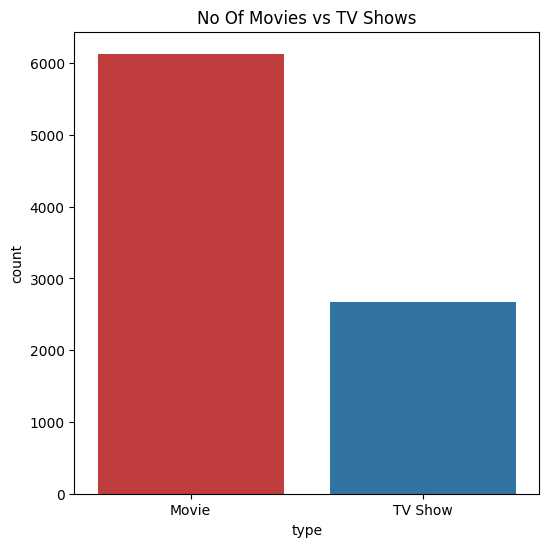

In [ ]:
plt.figure(figsize=(6,6))
colors = ["tab:red","tab:blue"]
sns.countplot(x ='type', data = df ,palette=colors )
plt.title("No Of Movies vs TV Shows")
plt.show()

⏩⏩ **Conclusion1 : The number of Movies are much more than TV shows released overall**

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown_Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown_Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown_Director,unknown_Cast,unknown_Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown_Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df_director = df.director.value_counts().nlargest(n=20)
df_director

unknown_Director          2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Steven Spielberg            11
Don Michael Paul            10
David Dhawan                 9
Yılmaz Erdoğan               8
Quentin Tarantino            8
Lance Bangs                  8
Shannon Hartman              8
Troy Miller                  8
Kunle Afolayan               8
Johnnie To                   8
Name: director, dtype: int64

**Barplot : -**

<Axes: >

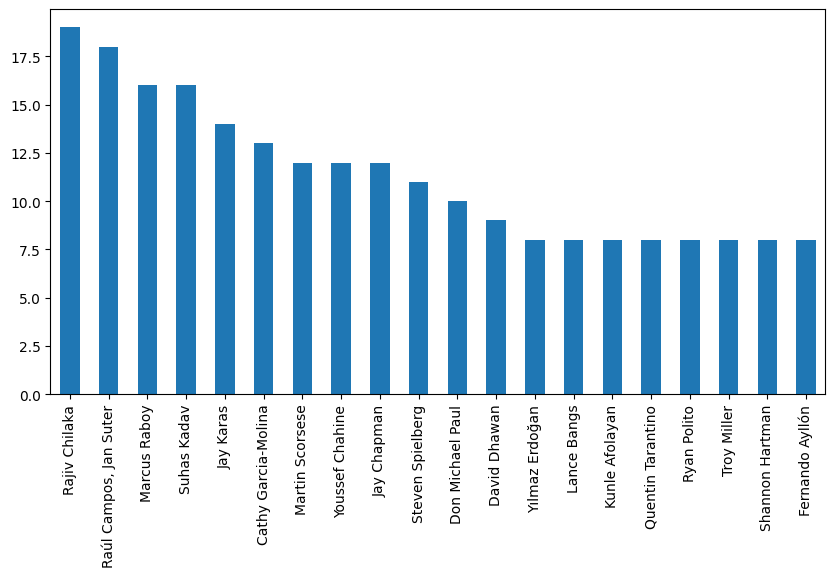

In [ ]:
# Count the occurrences of each director
df = df[df['director'] != 'unknown_Director']
df_director = df['director'].value_counts().nlargest(n=20).plot.bar(plt.figure(figsize=(10, 5)))
df_director

⏩**Conclusion - Rajiv Chilaka ,Raúl Campos, Jan Suter are the most famous Directors across thr Netflix**

 ### **Visual Analysis - Univariate, Bivariate after pre-processing of the data**

**1) For continuous variable(s): Distplot, countplot, histogram for univariate analysis**

**Histogram -**

**Movies/TV Show added on Netflix using -'date_added'**

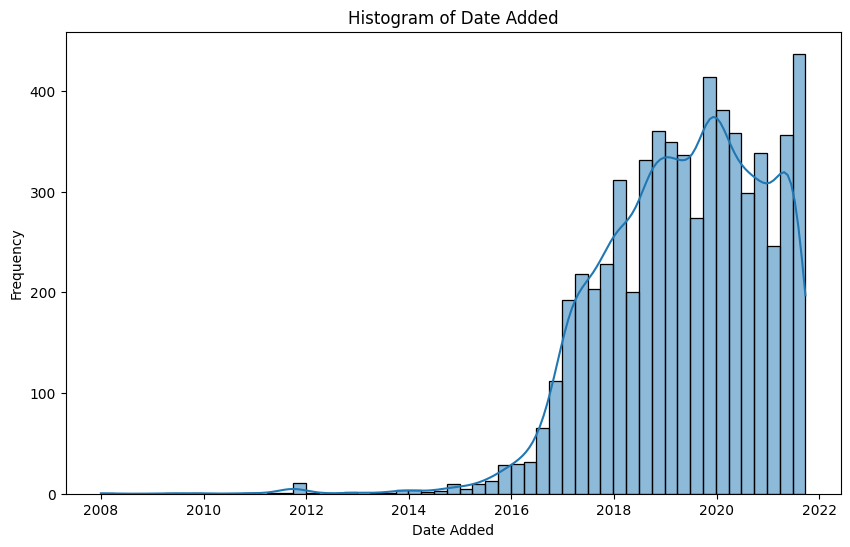

In [ ]:
# Convert 'date_added' column to datetime
df['date_added'] = pd.to_datetime(df['date_added'])
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=df['date_added'] ,  kde=True)
plt.xlabel('Date Added')
plt.ylabel('Frequency')
plt.title('Histogram of Date Added')
plt.show()

**Displot : -**

>> **duration for Tv Shows**

<Figure size 1500x1000 with 0 Axes>

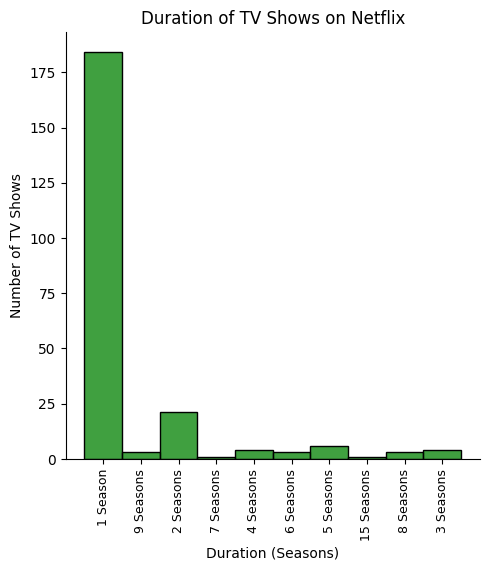

In [ ]:
#duration for Tv Shows and Movies

# filter the dataset to include only TV shows
tv_shows = df[df['type'] == 'TV Show']

# create a displot for the duration of TV shows
plt.figure(figsize=(15, 10))
sns.displot(tv_shows['duration'], kde=False, color='green', bins=20)
plt.title('Duration of TV Shows on Netflix')
plt.xticks(rotation = 90 , fontsize = 9)
plt.xlabel('Duration (Seasons)')
plt.ylabel('Number of TV Shows')
plt.show()


⏩ **Conclusion - maximum TV Shows is released with his First Season Only.**

>> **duration for Movies**

In [ ]:
df1 = df.loc[df['type'] == 'Movie', 'duration'].value_counts()

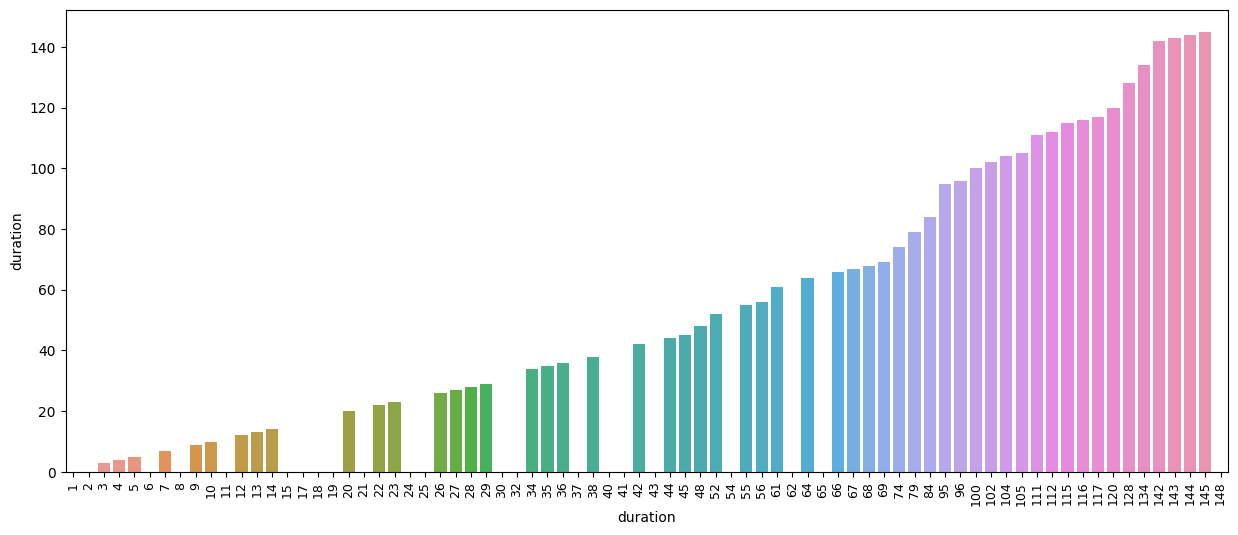

In [ ]:
#duration for Movies
plt.figure(figsize=(15,6))
sns.barplot(data = df1, y = df1.values , x = df1.index)
sns.color_palette("Spectral", as_cmap=True)
plt.xticks(rotation = 90, fontsize = 9)
plt.show()

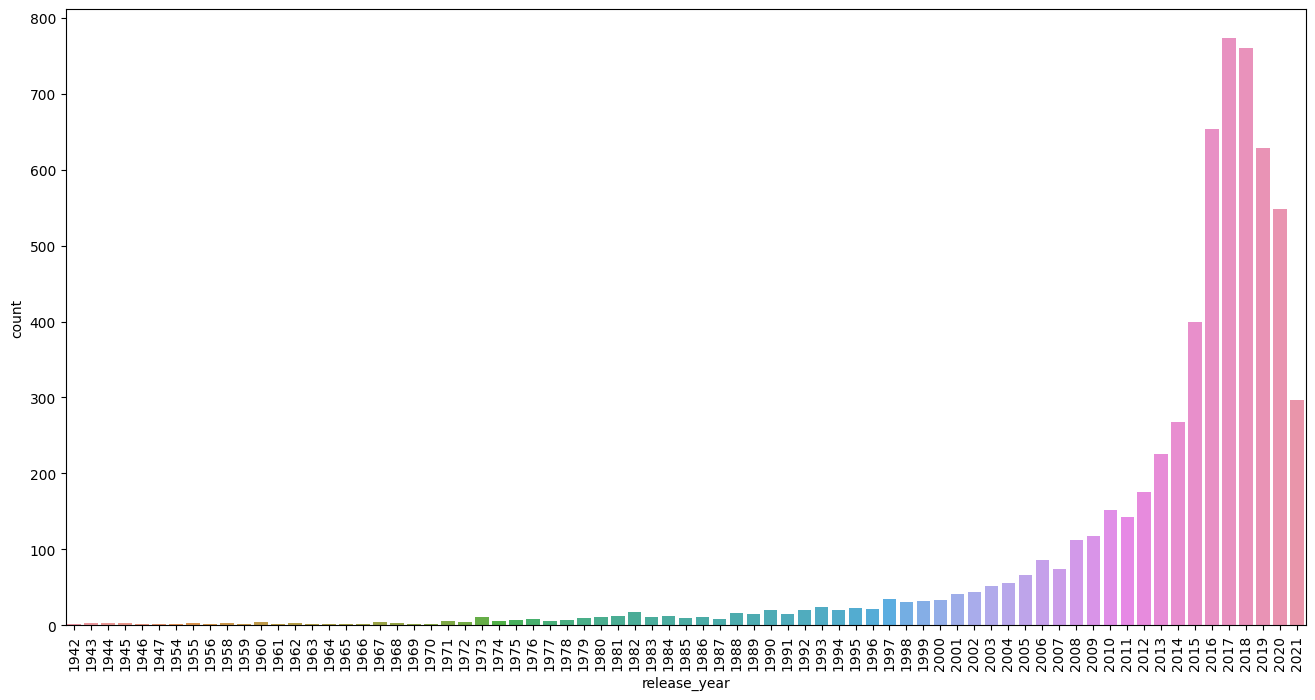

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(x ='release_year', data = df)
plt.xticks(rotation = 90)
plt.show()

**2) For categorical variable(s): Boxplot**

<Axes: xlabel='type', ylabel='release_year'>

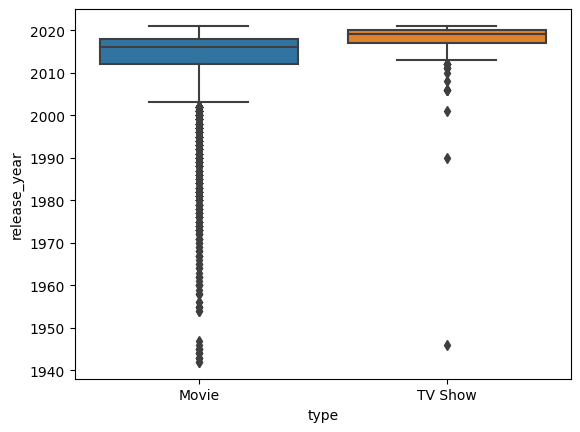

In [ ]:
# create a boxplot
sns.boxplot(x=df['type'], y=df['release_year'])

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown_Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",unknown_Country,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",unknown_Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


###**Insights based on Non-Graphical and Visual Analysis**

**1) Comments on the range of attributes : -**

In [ ]:
# Top 3 directors with most number of movies / Tv shows

df['director'].value_counts()[:4]

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Name: director, dtype: int64

In [ ]:
# Top 3 actors with most number of movies/ TV shows

df['cast'].value_counts()[:4]

unknown_Cast                                                                               473
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil     13
Samuel West                                                                                 10
Jeff Dunham                                                                                  7
Name: cast, dtype: int64

In [ ]:
# Top 3 countries with most number of movies/ TV shows

df['country'].value_counts()[:4]

United States      2048
India               890
unknown_Country     422
United Kingdom      212
Name: country, dtype: int64

In [ ]:
# Top 3 rating for most number of movies/ TV shows

df['rating'].value_counts()[:3]

TV-MA    2117
TV-14    1457
R         795
Name: rating, dtype: int64

In [ ]:
# Top 3 genre with most number of movies

df['listed_in'].value_counts()[:3]

Dramas, International Movies    361
Documentaries                   334
Stand-Up Comedy                 309
Name: listed_in, dtype: int64

**2) Comments on the distribution of the variables and relationship between them :-**

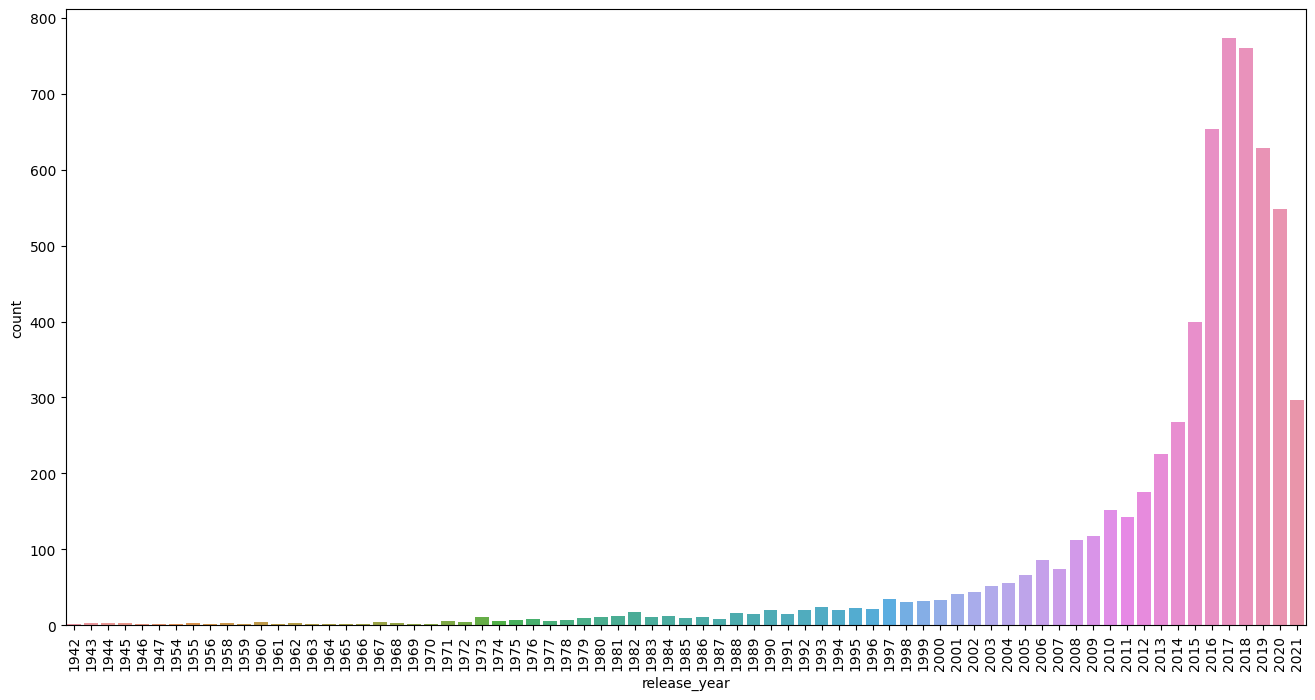

In [ ]:
# number of movies per year are incresing each year
plt.figure(figsize=(16, 8))
sns.countplot(x ='release_year', data = df)
plt.xticks(rotation = 90)
plt.show()

⏩**Comment - Due to pandamic occured in 2019-2022 ,there is a fall in movie productions.**

### **7. Business Insights - Should include patterns observed in the data along with what you can infer from it**

Text(0, 0.5, 'Number of Movies')

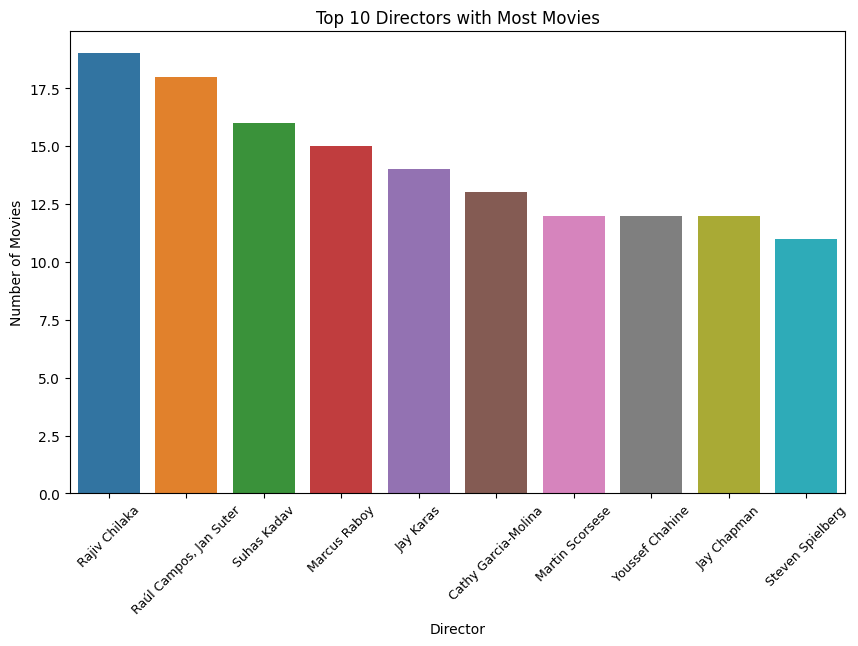

In [ ]:
# best director according to number of movies
director_counts = df[df['type'] == 'Movie']['director'].value_counts()

# create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=director_counts[:10].index, y=director_counts[:10].values)
plt.title('Top 10 Directors with Most Movies')
plt.xticks(rotation = 45 , fontsize = 9)
plt.xlabel('Director')
plt.ylabel('Number of Movies')

In [ ]:
# most viewed genre
df['listed_in'].value_counts()[:3]

Dramas, International Movies    361
Documentaries                   334
Stand-Up Comedy                 309
Name: listed_in, dtype: int64

In [ ]:
# Understanding what content is available in different countries
content = df.groupby('country')[['listed_in']].aggregate(
    content = ('listed_in', 'max')
).reset_index()

content

,country,content
0,", France, Algeria","Dramas, Independent Movies, International Movies"
1,Argentina,Stand-Up Comedy
2,"Argentina, Brazil, France, Poland, Germany, De...","Dramas, International Movies, Thrillers"
3,"Argentina, Chile","Dramas, International Movies"
4,"Argentina, Chile, Peru","Comedies, International Movies, Sports Movies"
...,...,...
654,"Venezuela, Colombia","Documentaries, International Movies"
655,Vietnam,"Horror Movies, International Movies, Thrillers"
656,West Germany,"Documentaries, International Movies"
657,Zimbabwe,"Comedies, International Movies, Romantic Movies"


In [ ]:
content.loc[(content['country'] == 'United States') | (content['country'] == 'India') | (content['country'] == 'United Kingdom')]

,country,content
219,India,TV Shows
444,United Kingdom,Thrillers
530,United States,Thrillers


###**2. Comparison of tv shows vs. movies.**
* **a. Find the number of movies produced in each country and pick the top 10
countries**

In [ ]:
df.type.value_counts()

Movie      5943
TV Show     230
Name: type, dtype: int64

In [ ]:
df2 = df.groupby(['country' , 'type']).size().unstack().fillna(0).reset_index().sort_values(by="Movie", ascending = False)
df2 = df2.nlargest(n=10, columns = 'Movie')
df2

type,country,Movie,TV Show
530,United States,2000,48
219,India,881,9
658,unknown_Country,381,41
444,United Kingdom,191,21
50,Canada,116,3
386,Spain,95,11
128,Egypt,90,0
321,Nigeria,86,4
239,Indonesia,77,0
137,France,75,6


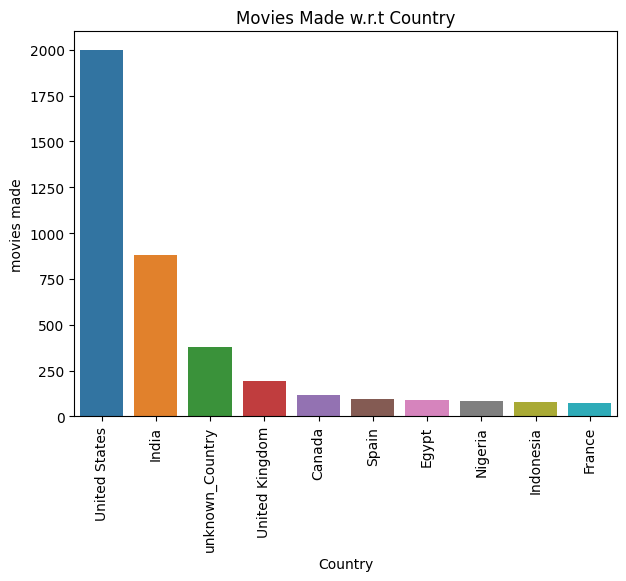

In [ ]:
plt.figure(figsize=(7,5))
plot= sns.barplot(data = df2, x='country', y= 'Movie')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

#specfiy axis labels
plot.set(xlabel='Country',
       ylabel='movies made',
       title='Movies Made w.r.t Country')
plt.show()

 **b. Find the number of Tv-Shows produced in each country and pick the top 10
countries.**

In [ ]:
df3 = df.groupby(['country' , 'type']).size().unstack().fillna(0).reset_index().sort_values(by="TV Show", ascending = False)
df3 = df3.nlargest(n=10, columns = 'TV Show')
df3

type,country,Movie,TV Show
530,United States,2000,48
658,unknown_Country,381,41
444,United Kingdom,191,21
386,Spain,95,11
280,Japan,75,10
380,South Korea,39,10
219,India,881,9
424,Taiwan,12,7
38,Brazil,47,6
137,France,75,6


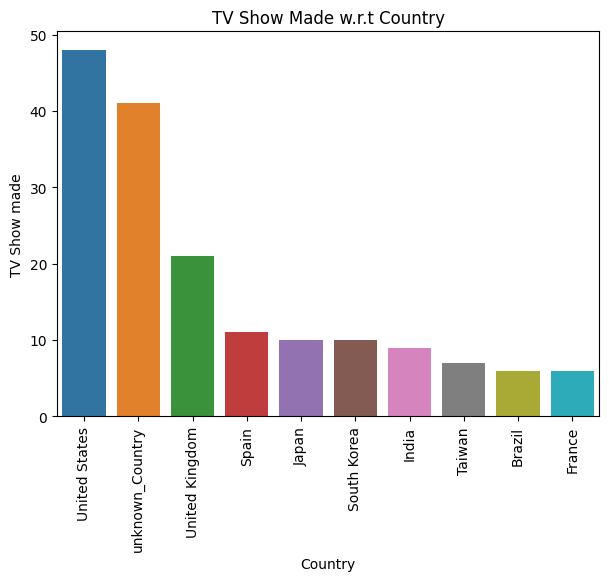

In [ ]:
plt.figure(figsize=(7,5))
plot= sns.barplot(data = df3, x='country', y= 'TV Show')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

#specfiy axis labels
plot.set(xlabel='Country',
       ylabel='TV Show made',
       title='TV Show Made w.r.t Country')
plt.show()

###**3. What is the best time to launch a TV show?**

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown_Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",unknown_Country,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",unknown_Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [ ]:
# Convert 'date_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract week from 'date_added' and create separate columns for year and week
df['year_added'] = df['date_added'].dt.year
df['Month'] = df['date_added'].dt.month
df['day'] = df['date_added'].dt.day
df['weekday_name'] = df['date_added'].dt.strftime('%a')
df['week_added'] = df['date_added'].dt.isocalendar().week

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Month,day,weekday_name,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,Sat,38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown_Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24,Fri,38
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",unknown_Country,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9,24,Fri,38
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",unknown_Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,24,Fri,38
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,24,Fri,38


In [ ]:
# Group by week and count the number of releases for TV shows and Movies
tv_shows_weekly_counts = df.groupby(['year_added','Month', 'week_added','weekday_name']).size().reset_index(name='TV Show').sort_values(by = "TV Show", ascending = False)
tv_shows_weekly_counts

,year_added,Month,week_added,weekday_name,TV Show
1022,2020,1,1,Wed,98
971,2019,11,44,Fri,74
494,2018,3,9,Thu,70
995,2019,12,1,Tue,67
649,2018,10,40,Mon,65
...,...,...,...,...,...
348,2017,8,32,Tue,1
975,2019,11,45,Thu,1
343,2017,8,32,Fri,1
341,2017,8,31,Thu,1


**conclusion :-**

**We can clearly see from the above data that - in the 1st/last month of Every Year and on Wednesday / Friday - any Tv Show should be released.**

In [ ]:
movies_weekly_counts = df.groupby(['year_added','Month', 'week_added','weekday_name']).size().reset_index(name='Movie').sort_values(by = "Movie", ascending = False)
movies_weekly_counts

,year_added,Month,week_added,weekday_name,Movie
1022,2020,1,1,Wed,98
971,2019,11,44,Fri,74
494,2018,3,9,Thu,70
995,2019,12,1,Tue,67
649,2018,10,40,Mon,65
...,...,...,...,...,...
348,2017,8,32,Tue,1
975,2019,11,45,Thu,1
343,2017,8,32,Fri,1
341,2017,8,31,Thu,1


**conclusion :-**

**We can clearly see from the above data that - in the 1st/last month of Every Year and on Wednesday / Friday - any movie should be released.**

 **b. Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-shows and Movies**

 >> **for TV Shows**

<ipython-input-281-d5a33b8bde4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['month_added'] = pd.to_datetime(tv_shows['date_added']).dt.month_name()


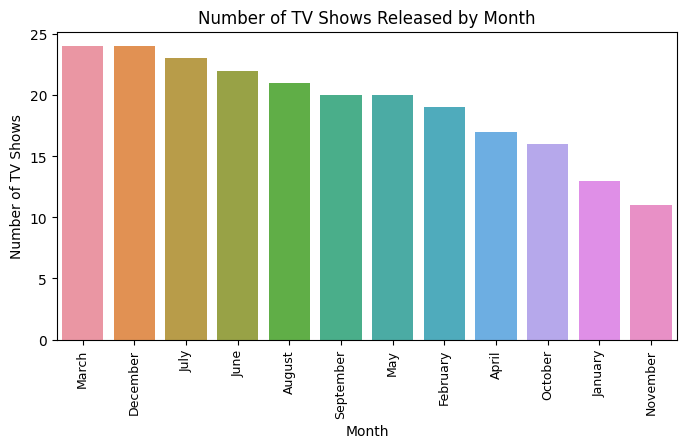

In [ ]:
# extract the month from the 'date_added' column for each TV show
tv_shows = df[df['type'] == 'TV Show']
tv_shows['month_added'] = pd.to_datetime(tv_shows['date_added']).dt.month_name()

# count the number of TV shows released in each month
tv_shows_counts = tv_shows['month_added'].value_counts()

# create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=tv_shows_counts.index, y=tv_shows_counts.values)
plt.title('Number of TV Shows Released by Month')
plt.xticks(rotation = 90 , fontsize = 9)
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')
plt.show()

⏩ **Comment - December is the best month to release the TV Shows**

>> **for movies**

<ipython-input-282-a7d29f33865f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['month_added'] = pd.to_datetime(movies['date_added']).dt.month_name()


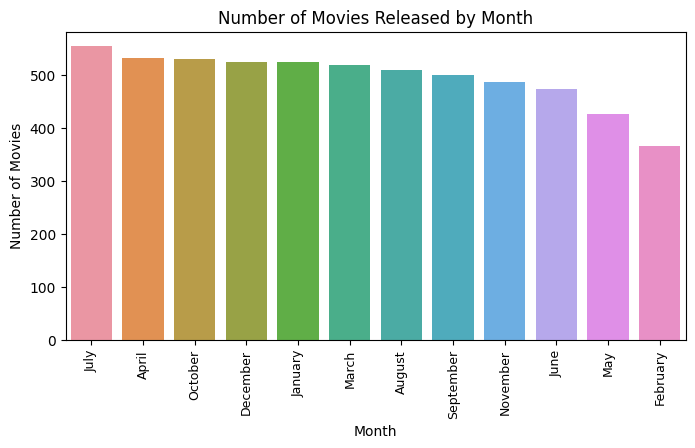

In [ ]:
# extract the month from the 'date_added' column for each movie
movies = df[df['type'] == 'Movie']
movies['month_added'] = pd.to_datetime(movies['date_added']).dt.month_name()

# count the number of movies released in each month
movies_counts = movies['month_added'].value_counts()

# create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=movies_counts.index, y=movies_counts.values)
plt.title('Number of Movies Released by Month')
plt.xticks(rotation = 90 , fontsize = 9)
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.show()

⏩ **Comment - July is the best month to release the movie**

###**4. Analysis of actors/directors of different types of shows/movies.**



**Identify the top 10 directors who have appeared in most movies or TV shows.**

In [ ]:
# count the number of appearances of each director
director_counts = df['director'].value_counts()

# print the top 10 directors with the most appearances
print(director_counts.head(10))

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64


###**5. Which genre movies are more popular or produced more**

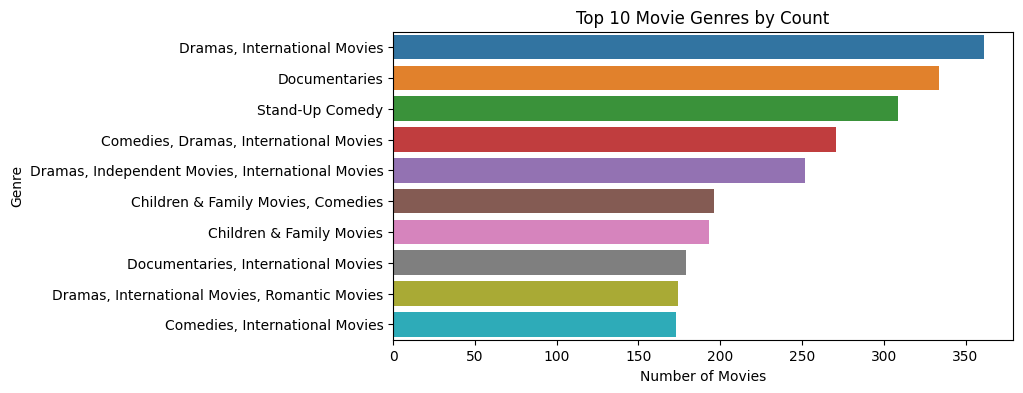

In [ ]:
# count the number of movies in each genre
genre_counts = df[df['type'] == 'Movie']['listed_in'].value_counts()

# create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=genre_counts[:10].values, y=genre_counts[:10].index)
plt.title('Top 10 Movie Genres by Count')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

⏩ **Comment :- Drama, international Movies are more popular**

### **6. Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)**

In [ ]:
import pandas as pd

# Sample data (assuming you already have the DataFrame 'df' defined)
# Convert 'date_added' column to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Calculate the time difference in days
df['days_to_add'] = (df['date_added'] - pd.to_datetime(df['release_year'], format='%Y')).dt.days

# Filter for movies
movies_df = df[df['type'] == 'Movie']

# Print the DataFrame with the calculated 'days_to_add'
print(movies_df[['title', 'release_year', 'date_added', 'days_to_add']])


                                 title  release_year date_added  days_to_add
0                 Dick Johnson Is Dead          2020 2021-09-25          633
6     My Little Pony: A New Generation          2021 2021-09-24          266
7                              Sankofa          1993 2021-09-24        10493
9                         The Starling          2021 2021-09-24          266
12                        Je Suis Karl          2021 2021-09-23          265
...                                ...           ...        ...          ...
8801                           Zinzana          2015 2016-03-09          433
8802                            Zodiac          2007 2019-11-20         4706
8804                        Zombieland          2009 2019-11-01         3956
8805                              Zoom          2006 2020-01-11         5123
8806                            Zubaan          2015 2019-03-02         1521

[5943 rows x 4 columns]


##**Data Analysis with Different Approach ⏩**





In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,Month,day,weekday_name,week_added,days_to_add
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,Sat,38,633
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown_Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24,Fri,38,266
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",unknown_Country,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9,24,Fri,38,266
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",unknown_Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,24,Fri,38,266
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,24,Fri,38,10493


#### **Ques:- Highest Percentange of Releasing movies in which country ?**

In [ ]:
df['country'].value_counts()

United States                         2048
India                                  890
unknown_Country                        422
United Kingdom                         212
Canada                                 119
                                      ... 
Singapore, Malaysia                      1
Switzerland                              1
Italy, Belgium                           1
United Kingdom, Hungary, Australia       1
United Arab Emirates, Jordan             1
Name: country, Length: 659, dtype: int64

In [ ]:
df2 = df.groupby(['country' , 'type']).size().unstack().fillna(0)
df2
df2.loc['United States']

type
Movie      2000
TV Show      48
Name: United States, dtype: int64

In [ ]:
df2.loc['India']

type
Movie      881
TV Show      9
Name: India, dtype: int64

**As We can see above - > movies released are highest in USA**

In [ ]:
# The percentage of movies released are highest in USA out of total percentage of movies in other countries
movie_percentage = (df2['Movie']/df2['Movie'].sum() * 100).sort_values(ascending = False)
movie_percentage.head().round(2)

country
United States      33.65
India              14.82
unknown_Country     6.41
United Kingdom      3.21
Canada              1.95
Name: Movie, dtype: float64

**Conclusion :-** **The percentage of movies released are highest in USA out of total percentage of movies in other countries**


**Data Visualization with the help of graph-**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0.5, 0, 'Country'),
 Text(0, 0.5, '% of movies made'),
 Text(0.5, 1.0, 'Movies Made w.r.t Country')]

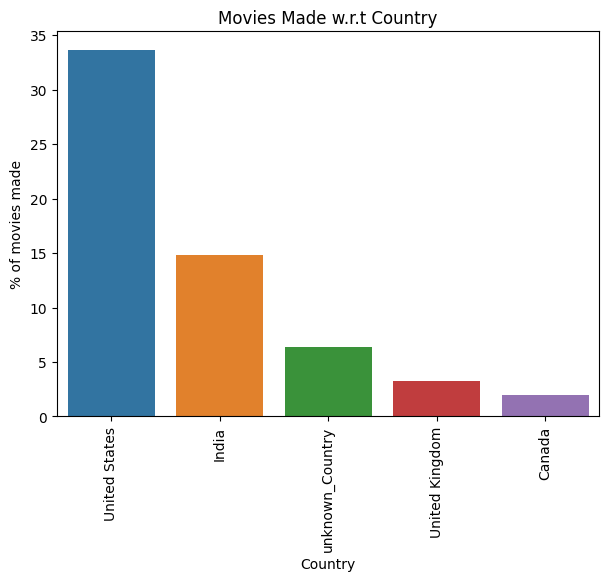

In [ ]:
plt.figure(figsize=(7,5))
plot_1= sns.barplot(x=movie_percentage.nlargest().index, y= movie_percentage.nlargest().values)
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)

#specfiy axis labels
plot_1.set(xlabel='Country',
       ylabel='% of movies made',
       title='Movies Made w.r.t Country')

#### **Ques :- Inside the Movies, which Genre of movies liked the most ?**

In [ ]:
# Dramas and International Movies are the most popular genre followed by documentries
df['listed_in'].value_counts().nlargest(n =10)

Dramas, International Movies                        361
Documentaries                                       334
Stand-Up Comedy                                     309
Comedies, Dramas, International Movies              271
Dramas, Independent Movies, International Movies    252
Children & Family Movies, Comedies                  196
Children & Family Movies                            193
Documentaries, International Movies                 179
Dramas, International Movies, Romantic Movies       174
Comedies, International Movies                      173
Name: listed_in, dtype: int64

**Conclusion :- Dramas and International Movies are the most popular whith respect to all other genre(listed_in)**

*shown by graph --*

<Axes: >

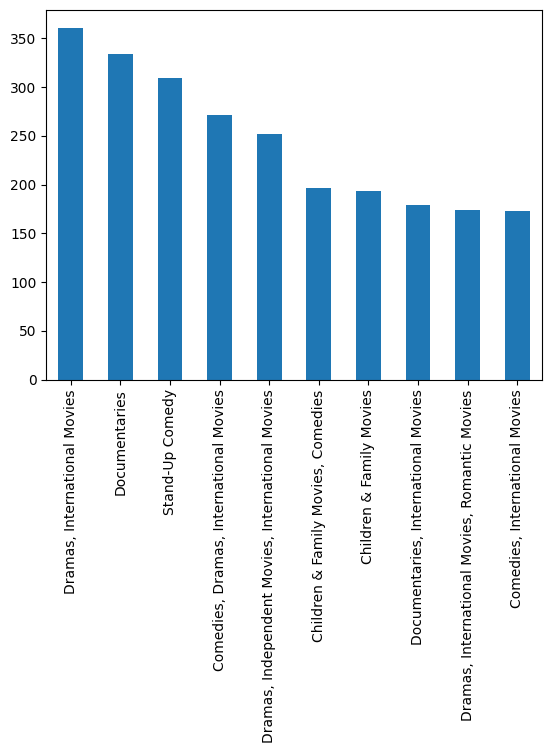

In [ ]:
df['listed_in'].value_counts().nlargest(n=10).plot.bar()

#### **Ques:- Which TV Shows Categories is the most popular choice**

In [ ]:
df4 = df.groupby(['type' , 'listed_in']).size().unstack().fillna(0).transpose().sort_values(by= 'TV Show' , ascending = False)
df4

type,Movie,TV Show
listed_in,,
"Crime TV Shows, International TV Shows, TV Dramas",0,18
Docuseries,0,17
"International TV Shows, Romantic TV Shows, TV Comedies",0,12
"Crime TV Shows, Docuseries, International TV Shows",0,12
TV Shows,0,11
...,...,...
"Classic Movies, Comedies, Sports Movies",1,0
"Classic Movies, Comedies, Romantic Movies",1,0
"Classic Movies, Comedies, Music & Musicals",2,0


**Conclusion :- In TV Shows Categories - > KIDS TV is most popular choice**

<Axes: xlabel='listed_in'>

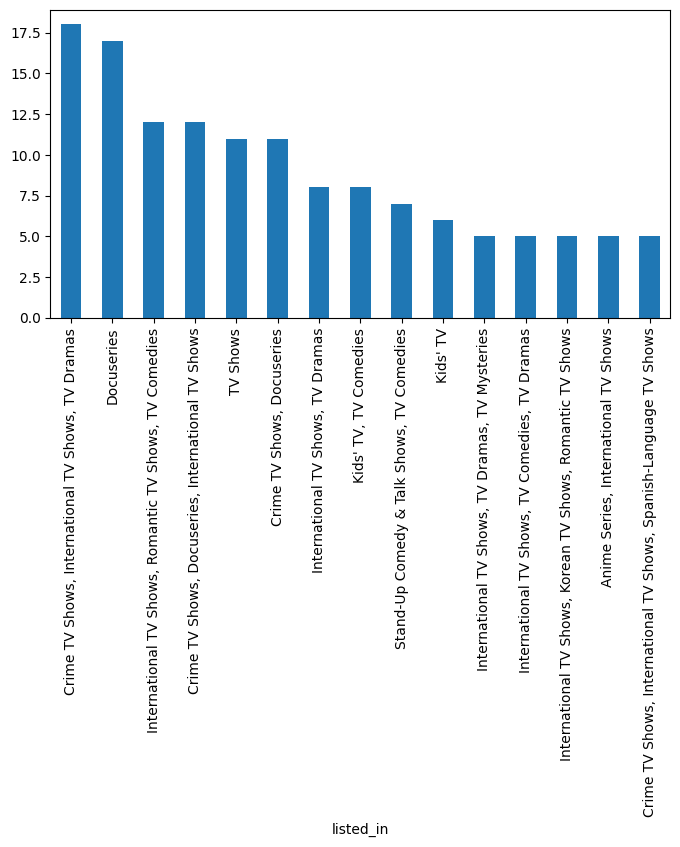

In [ ]:
# In TV Shows Categories KIDS TV is most popular choice
df4['TV Show'].nlargest(n= 15).plot.bar(figsize = (8,4))

#### **Ques :- In Which Year TV Shows are more released than Movies**

In [ ]:
df5 = df.groupby(['type','release_year']).size().unstack().transpose().fillna(0).sort_values(by= 'release_year' , ascending = False)
df5

type,Movie,TV Show
release_year,,
2021,252,45
2020,495,53
2019,598,31
2018,737,23
2017,748,25
...,...,...
1946,1,1
1945,3,0
1944,3,0


In [ ]:
df6 = df5[df5["Movie"] < df5["TV Show"]]
df6

type,Movie,TV Show
release_year,,


In [ ]:
df5.head()

type,Movie,TV Show
release_year,,
2021,252,45
2020,495,53
2019,598,31
2018,737,23
2017,748,25




**Conclusion -**

*   IN 2021 the TV Shows are more than Movie released but year below than 2021 , there is a opposite trend
*   Also , the number of releases are also lesser in 2021 than the other corrosponding years



#### **Ques:- In which Year Highest number of movies are released  and what the trends says ?**

In [ ]:
df6 = df5[df5["Movie"] > df5["TV Show"]]
df6.nlargest(n=10 , columns = ['Movie'])

type,Movie,TV Show
release_year,,
2017,748,25
2018,737,23
2016,641,12
2019,598,31
2020,495,53
2015,388,12
2014,258,9
2021,252,45
2013,222,3


In [ ]:
df5.reset_index().sort_values(by ='release_year', ascending = False).nlargest(n=20, columns ='release_year')

type,release_year,Movie,TV Show
0,2021,252,45
1,2020,495,53
2,2019,598,31
3,2018,737,23
4,2017,748,25
5,2016,641,12
6,2015,388,12
7,2014,258,9
8,2013,222,3
9,2012,170,5


**Conclusion :- Highest number of movies are released in 2018 and afterwards there is a downwards trend with increasing year**

shown by graph :-

<Axes: xlabel='release_year'>

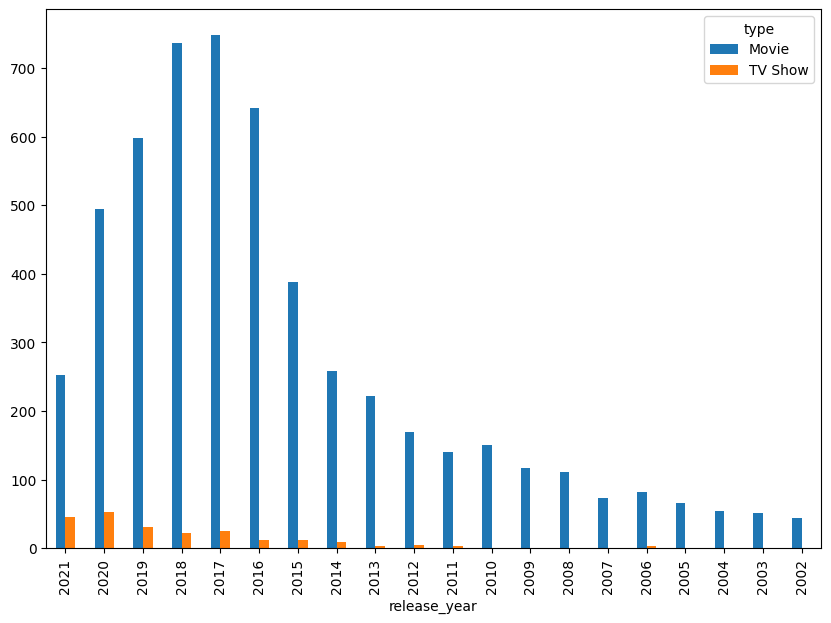

In [ ]:
df5.head(20).plot.bar( figsize = (10,7))

**Ques:- How many ratings are available in the netfilx ?**

In [ ]:
df['rating'].value_counts()

TV-MA       2117
TV-14       1457
R            795
TV-PG        538
PG-13        489
PG           286
TV-G         159
TV-Y7        132
TV-Y         112
NR            75
0              4
TV-Y7-FV       4
UR             3
NC-17          2
Name: rating, dtype: int64

In [ ]:
#Explanation of the symbols in the Rating column:

**Explanation of the symbols in the Rating column: Here is an explanation of the abbreviations in the "rating" column of the Netflix data:**

**TV-MA:** Movies for mature audiences. Contains content that may not be suitable for children under the age of 17.

**TV-14:** The film is intended for audiences aged 14 and over. May contain content requiring adult guidance.

**TV-PG:** Movies for children and teenagers. May contain some episodes not suitable for small children.

**R:** The movie needs adult guidance for audiences under 17 years old.

**PG-13:** The film is intended for audiences 13 years and older. May contain some episodes not suitable for small children.

**TV-Y7:** Movies for children aged 7 and up. May contain some drama but not scary.

**TV-Y:** Movies for all ages. No scary or dramatic content.

**NR:** No age specified. Usually appears in cases of independent films or without a specific rating.

**G:** Movies for all ages. Suitable for family and children.

**TV-Y7-FV:** The movie is intended for children aged 7 and up and may contain humor.

**NC-17:** The film is only for audiences 17 years and older.

**UR:** Age unknown. Usually appears when the movie has not been rated or has no age information.


In [ ]:

df7 = df.groupby(['type','rating']).size().unstack().transpose().fillna(0).sort_values(by= 'rating' , ascending = False)
df7.reset_index().nlargest(10,['Movie'])


type,rating,Movie,TV Show
5,TV-MA,1993,124
7,TV-14,1393,64
8,R,794,1
4,TV-PG,517,21
9,PG-13,489,0
10,PG,286,0
6,TV-G,155,4
2,TV-Y7,123,9
3,TV-Y,105,7
11,NR,75,0


**Conclusion :- Maximum Movies and TV Shows are released with the TV-MA rating - CONTENT is released for mature audiences. Contains content that may not be suitable for children under the age of 17.**

**Shown in the Graph -->**

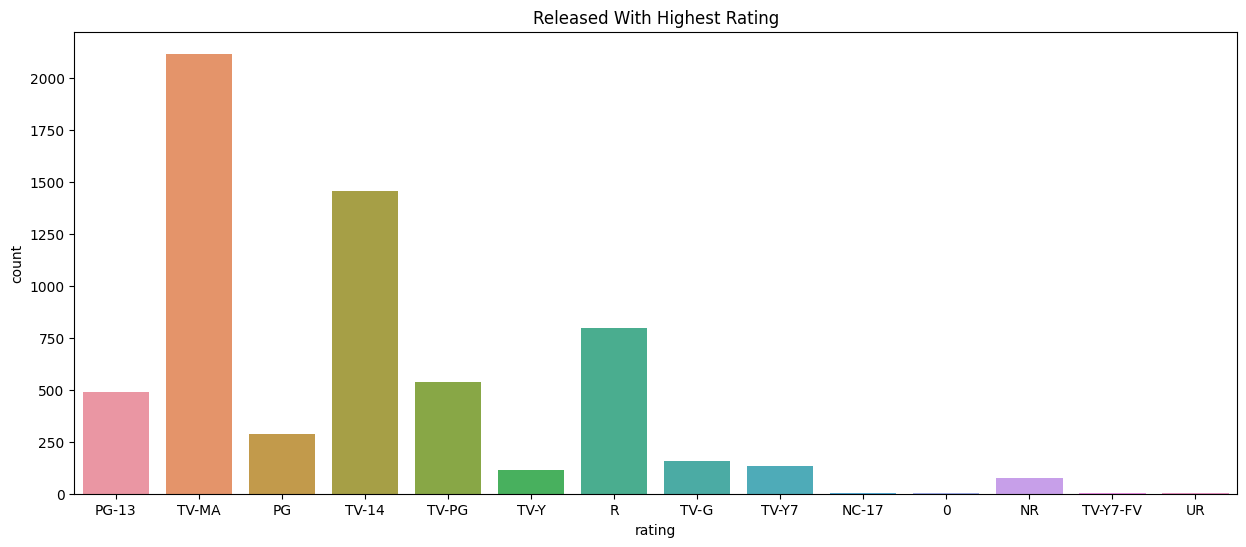

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='rating',data = df)
plt.title("Released With Highest Rating")



plt.show()

#### **Ques -:- in Which year India has produced highest no of movies and Tv shows ?**

In [ ]:
india_data = df[df['country'] == 'India']['release_year'].value_counts().sort_values(ascending = False).head(10)
india_data

2017    97
2018    81
2019    73
2016    71
2020    61
2015    53
2013    51
2014    45
2012    36
2010    31
Name: release_year, dtype: int64

**conclusion - in 2017 highest no of movies and TV Shows has been produced**

*shown in the graph-->*

<Axes: ylabel='release_year'>

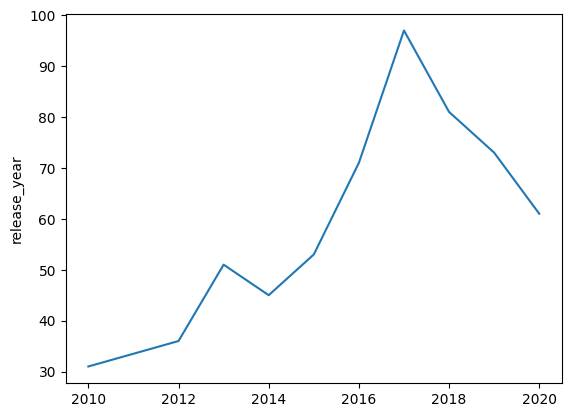

In [ ]:
# In India , highest number of releases were in 2017 , then there is a downwards trend
sns.lineplot(india_data)

### **Ques:- Which is the most number of watched seasons in TV Show ?**

In [ ]:
df_season= df[df['type']=='TV Show'].duration.value_counts()
df_season

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

# **Recommendation : -**


* Rajiv Chilaka, Jan Suter are considered as best directors according to more number of Movie releases. So these directors movies could help in grow bussiness for netflix

* Alastair Fothergill, Ken Burns are considered as best directors according to more number of TV Show releases . So these directors TV Shows are benificial to the Netflix bussiness

* International Movies, Dramas, Comedies are mostly viewed genre in Netflix, So movies with these genre has more demand
Anupam Kher, Shah Rukh Khan, Naseeruddin Shah are the best actors according to most number of movie releases and has good fan base, So these actors movies could help grow bussiness

* United States, India, United Kingdom these countries have the highest releases. So their is no risk of amount burn either in marketing or sales coz its already done.
* Due to pandamic occured in 2019-2022 their is a fall in movie productions.